In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
os.environ["TRANSFORMERS_CACHE"]="/workspace/cache"
os.environ["HF_DATASETS_CACHE"]="/workspace/cache"
os.environ["WANDB_DISABLED"] = "true"


In [25]:
import datasets
from datasets import load_dataset
from sentence_transformers import SentenceTransformer

import os
import requests
from tqdm import tqdm
import pickle 
from PIL import Image
from glob import glob
import numpy as np

In [3]:
with open('coyo_filtered_1k.pkl', 'rb') as file:   
    # Call load method to deserialze 
    coyo_dataset = pickle.load(file) 

In [4]:
coyo_images = glob('coyo_downloaded_images/*')
sea_vqa_images = glob('sea_vqa_downloaded_images/*')

In [5]:
model = SentenceTransformer("sentence-transformers/clip-ViT-B-32")

/root/anaconda3/envs/llava/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [18]:
coyo_images_embed = []
coyo_images_filtered = []
for img in tqdm(coyo_images):
    try:
        img_opened = Image.open(img)
        coyo_images_embed.append(model.encode(img_opened))
        coyo_images_filtered.append(img_opened)
    except:
        pass
    
sea_vqa_images_filtered = []
sea_vqa_images_embed = []
for img in tqdm(sea_vqa_images):
    try:
        img_opened = Image.open(img)
        sea_vqa_images_embed.append(model.encode(img_opened))
        sea_vqa_images_filtered.append(img_opened)
    except:
        pass

assert len(coyo_images_embed) == len(coyo_images_filtered)
assert len(sea_vqa_images_filtered) == len(sea_vqa_images_embed)

100%|██████████████████████████████████████████████████████████████████████| 1999/1999 [01:19<00:00, 25.14it/s]


In [17]:
scores = model.similarity(coyo_images_embed,sea_vqa_images_embed)

In [54]:
top_k=5
cands = []
for idx in range(1,len(coyo_images_filtered)):
    sorted_index = np.argsort(np.array(scores[idx]))[::-1]
    image = coyo_images_filtered[idx]
    print(f"Query:{image}")
    for rank, cand_idx in enumerate(sorted_index[:top_k]):
        print(f"Candidate:{sea_vqa_images_filtered[cand_idx]} score:{scores[idx][cand_idx]}")
        cands.append(sea_vqa_images_filtered[cand_idx])
    print("*"*100)
    break

Query:<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x667 at 0x7EFC6818E4D0>
Candidate:<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x750 at 0x7EFCD3202590> score:0.7226821184158325
Candidate:<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x750 at 0x7EFC5C96DAE0> score:0.7226821184158325
Candidate:<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x750 at 0x7EFC5C9DF520> score:0.7226821184158325
Candidate:<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750 at 0x7EFC5C6CCA60> score:0.7169685959815979
Candidate:<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750 at 0x7EFC5C5FFB50> score:0.7169685959815979
****************************************************************************************************


In [58]:
sorted_index

array([ 167,  486,  737, ...,   41,   42, 1813])

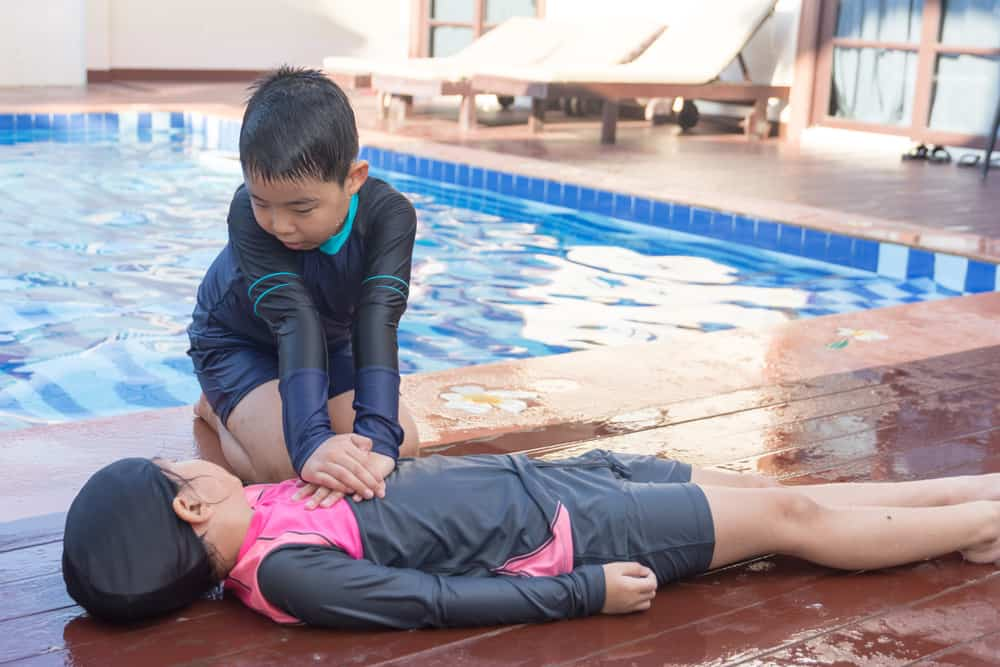

In [55]:
image

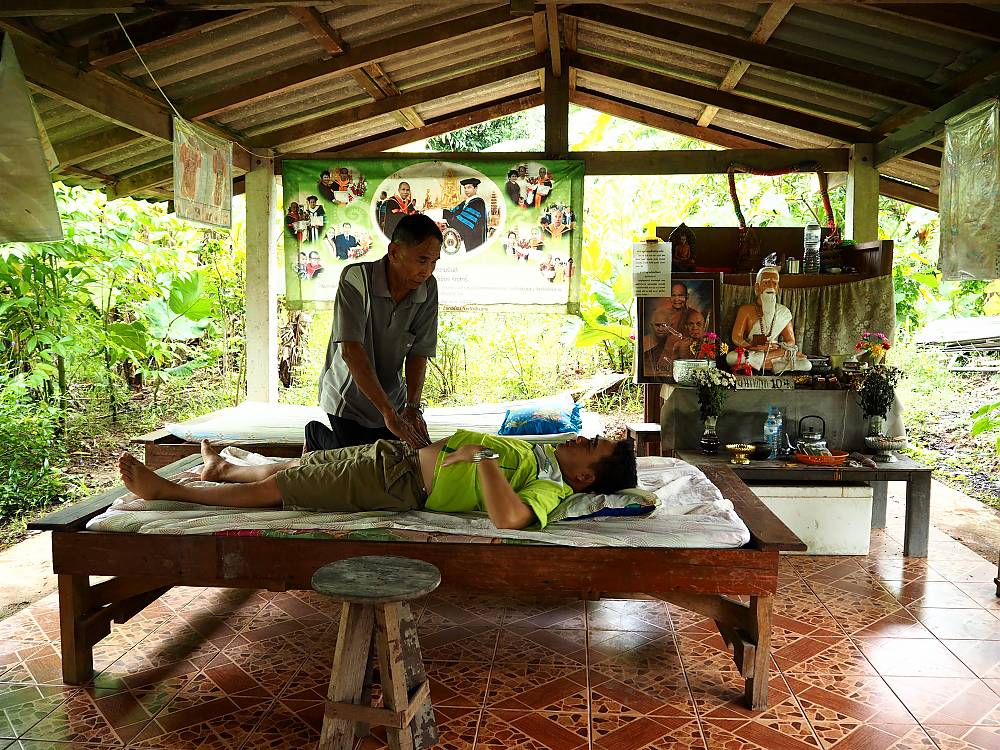

In [56]:
cands[0]

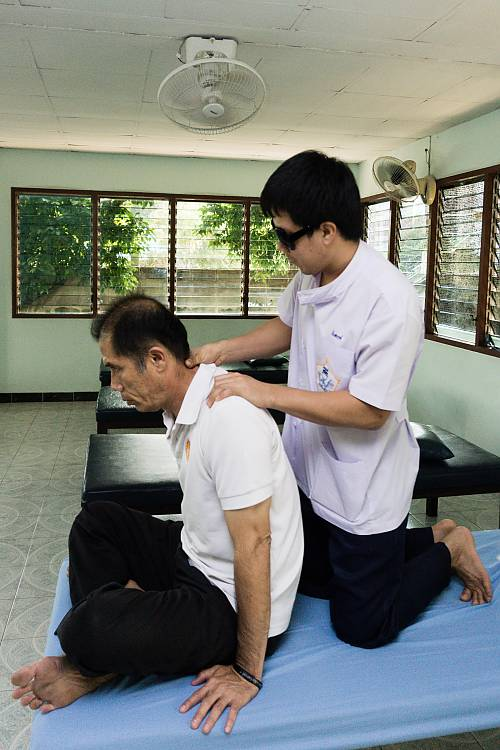

In [60]:
cands[-1]